# 0. Intro

#### This dataset provides us information about 140 921 users in dataset and our task is to predict probability of target ('target' column).

#### This notebook includes:
- EDA
- data preprocessing before using models.
- customers classification
- perform interpretation and analysis of classification that have been created.
- checking data drift in model monitoring section

In [1]:
# Necessary libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20,15
import seaborn as sns
sns.set_palette(palette='viridis')

# df output optimization for cases if we want to print lots of data:
pd.set_option('display.notebook_repr_html', True)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 100)

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [2]:
! pip install lightgbm -q
! pip install optuna -q

# 1. EDA

In [3]:
df = pd.read_csv('score_test.csv', delimiter=';')
df.head()

,target,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521
0,0.0,76616859,14,2,0,M,26,3,2,0,1,0,15,14000,1,1,38097,0,0,0,-1,-1,0,0,0,0,0,1,312,312,3000,3000,5500,0,8220,144,0,835,5,NaN,1000,14,154,1,5,1,0,1,22,4,2,1,1,"0,373379926",11,0,1,0,1,0,0,9,1,1,0,-1,-1,-1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1014,0,0,1,0,1,1,1,1,10,27,37,6,11,5,0,0,0,0,0,0,0,0,20,25,18,0,"21075,61",14900,27,28,37654,2,3,0,0,0,0,0,0,0,0,0,0,0,1,"32718,41","10939,42","9920,04","9048,67","8160,04","26389,33",4,5,20,2,2,2,2,2,147,33,9,9,17,1,"21178,45","2588,55","8315,14","6193,37","11858,95","5960,04","0,126718561",28,29,"21128,85","2516,65","0,123198601",28,28,"21371,7","2265,29","0,100221885",1,0,0,0,0,0,0,0,0,1,1,1,0,"0,978322971",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,"0,982912651","0,950575285",1,"0,917838816",1,"0,998557183",1,1,1,1,1,"0,666666667",2,2,1,1,"1,125",1,"1,0625",1,"0,988636842","1,11096151",1,1,1,1,"1,229258468",4,0,0,0,0,0,0,0,0,1,1,1,0,"1,018204929",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,"1,002347501","1,028569726",1,1,1,1,"1,028571429",4,0,0,0,0,0,0,0,0,1,1,1,0,"0,996133271",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,"0,982912651","0,950575285",1,"0,917838816"

In [4]:
df.shape

(140921, 523)

In [5]:
df.info() 
#df.info(verbose=True) commented for more usability on github

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140921 entries, 0 to 140920
Columns: 523 entries, target to f521
dtypes: float64(2), int64(327), object(194)
memory usage: 562.3+ MB


In [6]:
# due to huge amount of columns we have to optimize memory if we want to make some feature engineering (like adding etc.)
def memory_optimizer(df):
    for i in df.columns:
        df[i].dtype
        if str(df[i].dtype.name) == 'float64':
            if df[i].max() < np.finfo(np.float16).max and df[i].min() > np.finfo(np.float16).min:
                df[i] = df[i].astype('float16')
            elif  df[i].max() < np.finfo(np.float32).max and df[i].min() > np.finfo(np.float32).min:
                df[i] = df[i].astype('float32')
            
        elif str(df[i].dtype.name) == 'int64':
            if df[i].max() < np.iinfo(np.int8).max and df[i].min() > np.iinfo(np.int8).min:
                df[i] = df[i].astype('int8')
            elif  df[i].max() < np.iinfo(np.int16).max and df[i].min() > np.iinfo(np.int16).min:
                df[i] = df[i].astype('int16')
            elif  df[i].max() < np.iinfo(np.int32).max and df[i].min() > np.iinfo(np.int32).min:
                df[i] = df[i].astype('int32')
    
    #Start memory size
    print(df.memory_usage().sum() /1024/1024 , 'MB')
    
    return df

In [7]:
df = memory_optimizer(df)
df.info()

261.93157291412354 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140921 entries, 0 to 140920
Columns: 523 entries, target to f521
dtypes: float16(1), float64(1), int16(42), int32(6), int8(279), object(194)
memory usage: 261.9+ MB


In [8]:
# df.nunique() 
# here we find out the nature of features categorical/numerical and so on.
# commented for github comfort viewing

In [9]:
df.describe()

,target,id,f1,f2,f3,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f31,f32,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f53,f54,f55,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f341,f342,f346,f347,f369,f370,f483,f484
count,102718.000000,1.409210e+05,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,1.409210e+05,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.0,140921.0,140921.0,140921.000000,140921.0,140921.000000,140921.0,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,0.0,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.0,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.0,140921.0,140921.0,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.0,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,140921.000000,14092

So, we can notice that there are some problems in our dataset:
- we need to transform our fake-categorical variables that was created by using ',' instead of '.'
- we have fake-numerical variables that have few unique values (to determ as true categorical we will use biyndary of 200 unique values)
- and of course we need to drop duplicated, constant columns etc.

In [10]:
df_test = df[df['target'].isna()]
df = df[df['target'].notna()]

# Deleting columns with non-unique, duplicated and all NaN values
df = df.drop_duplicates()
df2 = df.T.drop_duplicates().T

df2 = df.T.drop_duplicates().T
dfcols = df2.columns
dtype = df[dfcols].dtypes.to_dict()
df = df2.astype(dtype)

df = df.loc[:, (df != df.iloc[0]).any()]
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101432 entries, 0 to 102717
Columns: 493 entries, target to f521
dtypes: float16(1), int16(41), int32(6), int8(254), object(191)
memory usage: 187.6+ MB


In [11]:
# data types checking
# df.info(verbose=True) commented for github view

In [12]:
df.isna().sum().sum()

0

In [13]:
# Data cleaning (probable false categoricals transforming)
categoricals = df.select_dtypes(include=['object']).columns

categoricals = categoricals.drop('f4')
df[categoricals] = df[categoricals].replace(',', '.', regex=True)
df[categoricals] = df[categoricals].astype('float64')
df = memory_optimizer(df)
df.info()

84.90015411376953 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101432 entries, 0 to 102717
Columns: 493 entries, target to f521
dtypes: float16(152), float32(39), int16(41), int32(6), int8(254), object(1)
memory usage: 84.9+ MB


In [14]:
y = df['target']
y = y.astype('int8')
X = df.drop(['target', 'id'], axis=1)
X.shape

(101432, 491)

In [15]:
y.value_counts()

0    76136
1    25296
Name: target, dtype: int64

In [16]:
X.shape

(101432, 491)

In [17]:
# commented for github view
# X.nunique().sort_values(ascending=False)

# 2. Data preprocessing before using models.

#### In this sectionwe are going to solve such tasks:
- encoding: one-hot and target (woe) 
- feature selection
- outliers for numerical features
- optional (only for regression): feature scaling

#### 2.1. Categorical features EDA and one-hot encoding (before train test split). 

This encoding is made before train test split 
because in train and test we can have different values and different dummy columns

In [18]:
# Categorical features EDA and one-hot encoding (before train test split)
uniques = pd.DataFrame(X.nunique().reset_index())
uniques.columns = ['feature', 'uniques']

uniques_dummies = uniques[(uniques['uniques']>2)&(uniques['uniques']<=9)]['feature']
X[uniques_dummies] = X[uniques_dummies].astype('category')
X = pd.get_dummies(data=X, dtype='int8', columns=X[uniques_dummies].columns)

uniques = pd.DataFrame(df.nunique().reset_index())
uniques.columns = ['feature', 'uniques']

uniques_oh = uniques[uniques['uniques']==2]['feature']

uniques_cat = uniques[(uniques['uniques']>2)&(uniques['uniques']<500)]['feature']
print('categorical_multiple', len(uniques_cat), '\ncategorical_binary', len(uniques_oh))
uniques_num = uniques[uniques['uniques']>=500]['feature']
print('numerical', len(uniques_num))

categorical_multiple 168 
categorical_binary 198
numerical 127


In [19]:
y.mean()

0.24938875305623473

#### 2.2. Target encoding methods (including woe-encoding are sensitive to overfitting so we need to make train_test_split)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=56)
train_df = pd.concat((X_train, y_train), axis=1)
print(train_df.shape)
train_df.head()

(81145, 560)


,f1,f2,f5,f9,f11,f12,f14,f15,f16,f17,f18,f22,f24,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f39,f40,f41,f43,f44,f45,f47,f48,f49,f50,f51,f52,f53,f55,f56,f60,f63,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f360,f361,f362,f363,f364,f365,f366,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f474,f475,f476,f477,f478,f479,f480,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f3_0,f3_1,f3_2,f3_3,f3_4,f3_5,f3_6,f4_F,f4_M,f4_U,f6_0,f6_1,f6_2,f6_3,f6_4,f6_5,f6_6,f7_-1,f7_0,f7_1,f7_2,f7_3,f8_0,f8_1,f8_3,f8_6,f8_7,f8_8,f8_9,f10_0,f10_1,f10_2,f10_3,f10_4,f10_5,f10_6,f13_-1,f13_1,f13_2,f13_3,f13_4,f13_6,f42_0,f42_1,f42_3,f46_0,f46_1,f46_2,f46_3,f57_0,f57_1,f57_2,f57_3,f58_0,f58_1,f58_2,f58_3,f58_4,f58_5,f58_6,f58_7,f59_0,f59_1,f59_2,f59_3,f59_4,f59_5,f59_6,f61_0,f61_1,f61_2,f62_0,f62_1,f62_2,f308_0,f308_1,f308_2,f308_3,f308_4,f308_5,f308_6,f308_7,f308_10,target
48862,15,6,46,1,1,15000,1,38098,0,0,0,0,0,1,8,8,1400.0,1400.0,1100,0,140.000000,0,1,-1,-1,0,0,4,-1,0,0,4,2,1,1,0,0.000000,8,1,0.000000,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,422,0,2,0,2,3,0,4,2,9,11,3,5,3,1,1,1,1,1,1,1,4,7,6,1,0.000000,0.000000,0,0,5796,1,1,0,0,0,0,1,1,0,0,1,1,1,5781.180176,0.000000,5781.180176,0.000000,0.0,5838.680176,2,4,5,0,0,0,2,2,74,11,5,3,14,0,3028.469971,0.000000,0.0,0.0,0.0,0.0,0.000000,0,0,2778.219971,0.000000,0.000000,0,0,2528.750000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.000000,2.000000,2.000000,0.0,0.000000,0.000000,2.000000,2.000000,2.000000,0.909757,0.0,0.909668,0.0,0.0,0.910643,1.500000,1.0,1.250000,0.0,0.0,0.0,1.000000,1.000000,1.043945,1.0,1.0,1.0,1.000000,0.0,1.098633,0.000000,0.0,0.0,0.0,0.0,0.000000,1.333

In [21]:
# Target (woe) encoding for categoricals with amount of unique values 3-200
from category_encoders import WOEEncoder
we = WOEEncoder()
X_train_woe = X_train[X_train.columns.intersection(uniques_cat)]
X_train_woe = X_train_woe.astype('category')
X_train_woe = pd.DataFrame(we.fit_transform(X_train_woe, y_train))

X_test_woe = X_test[X_test.columns.intersection(uniques_cat)]
X_test_woe = pd.DataFrame(we.transform(X_test_woe, y_test))

In [22]:
X_train_num = X_train[X_train.columns.intersection(uniques_num)]
X_test_num = X_test[X_test.columns.intersection(uniques_num)]

X_train_oh = X_train[X_train.columns.intersection(uniques_oh)]
X_test_oh = X_test[X_test.columns.intersection(uniques_oh)]

X_train = X_train_num.join([X_train_oh, X_train_woe])
X_test = X_test_num.join([X_test_oh, X_test_woe])

print(X_train.shape, '\n', X_test.shape)

(81145, 476) 
 (20287, 476)


#### 2.3. Outliers and feature selection
We use RFECV to define final features and woe to drop extremely weak predictors (woe<0.02)

In [23]:
# Calculate information value that will be used for feature selection (extremely low IV features excluding)
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                      
                    val,                                                           
                    df[df[feature] == val].count()[feature],                        
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) 

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()
#    print('This variable\'s IV is:',iv)
#    print(df[feature].value_counts())
    return iv

# outliers and missing values (NaNs)
def outlier(X):
    q1 = X.quantile(0.01)
    q3 = X.quantile(0.99)
    iqr = q3-q1
    lqi = q1 #- 1.5*iqr
    hqi = q3 #+ 1.5*iqr 
    X[(X > hqi)| (X < lqi) ] = np.nan #
    X.isna().sum()
    X = X.fillna(X.median())  
    return X

# feature selection
def feature_selection(X_train, y_train, X_test):
    from lightgbm import LGBMClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(solver= 'newton-cholesky', penalty='none', C=0.04893851892695899, n_jobs=-1, verbose=0)
    lgbm = LGBMClassifier(verbose= -1, learning_rate=0.1, max_depth=20, n_estimators=70, 
                          subsample=0.9, n_jobs=-1, random_state=5)
    
    cv = StratifiedKFold(n_splits=5, random_state=5, shuffle=True)
    
    # create a Fisher score scorer
    #fisher_scorer = make_scorer(f1_score, average='weighted')
    
    rfecv = RFECV(estimator=lgbm, n_jobs=-1, step=1, cv=cv, scoring='average_precision', min_features_to_select=1)
    rfecv_c = rfecv.fit(X_train, y_train)
    features = X_train.columns
    mask = rfecv.get_support()
    best_features = features[mask]
    
    X_train = X_train[X_train.columns.intersection(best_features)]
    X_test = X_test[X_train.columns.intersection(best_features)]
    return X_train, X_test

In [24]:
%%time
#def inform_values(df, target):
values = []
for i in uniques_oh:
    values.append(calc_iv(df=train_df[train_df.columns.intersection(uniques_oh)], feature=i, target='target'))
inform_values = pd.DataFrame()
inform_values['values'] = pd.DataFrame(values)
inform_values['feature'] = list(uniques_oh)
inform_values = inform_values.sort_values(by='values', ascending=False)
inform_values = inform_values.drop(index=0)
low_iv = inform_values[inform_values['values']<0.02]['feature']
X_train, X_test = X_train.drop(columns=low_iv), X_test.drop(columns=low_iv)

CPU times: total: 19.5 s
Wall time: 19.5 s


In [25]:
X_train.shape

(81145, 344)

In [26]:
X_train[X_train.columns.intersection(uniques_num)] = outlier(X_train[X_train.columns.intersection(uniques_num)])
X_test[X_test.columns.intersection(uniques_num)] = outlier(X_test[X_test.columns.intersection(uniques_num)])

In [27]:
%%time
X_train, X_test = feature_selection(X_train, y_train, X_test);
#X_train_s, X_test_s = feature_selection(X_train_s, y_train, X_test_s);

CPU times: total: 27min 46s
Wall time: 34min 45s


In [28]:
X_train.shape

(81145, 234)

# 3. Models

In [29]:
# tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# metrics
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, r2_score, confusion_matrix, make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# optuna
import optuna
from optuna.samplers import TPESampler
optuna.logging.set_verbosity(optuna.logging.FATAL)

In [30]:
# model evaluation and interpretation (roc_auc, feature importances/coefficients and heatmap)
def evaluation_interpretation(model_type, model):
    print(roc_auc_score(y_pred_train, y_train), 'roc_auc train')
    print(roc_auc_score(y_pred, y_test), 'roc_auc test')
    print('\nclassification report outliers 0,99/0,01\n', classification_report(y_pred, y_test))
    
    plt.figure(figsize=(12,5))
    ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')

    labelsx=['True','False']
    labels=['True','False']
    ax.set_xticklabels(labelsx)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Ground Truth')
    
    if model_type == 'lr':
        coef = model.coef_
        intercept = model.intercept_
        coef = pd.DataFrame(coef).T
        names = pd.DataFrame(X_train_s.columns)
        f_importances = pd.concat([names, coef],axis=1)
        f_importances.columns = ['Feature', 'Coefficient']
        f_importances = f_importances.sort_values(by='Coefficient', ascending=False)
    
    else:
        from sklearn.inspection import permutation_importance
        feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        f_importances = pd.Series(result.importances_mean, index=X_train_s.columns)
        f_importances = pd.DataFrame(f_importances).reset_index()
        f_importances.columns = ['Feature', 'Importance']
        f_importances['Importance'] = f_importances['Importance'] \
                                            /f_importances['Importance'].sum()
        f_importances = f_importances.sort_values(by='Importance', ascending=False)
        
    return f_importances

#### 3.1 Logistic Regression. Main advantage: interpretability

In [31]:
ss = StandardScaler()
X_train_s = pd.DataFrame(ss.fit_transform(X_train))
X_test_s = pd.DataFrame(ss.transform(X_test))
X_train_s.columns, X_test_s.columns = X_train.columns, X_test.columns

In [32]:
# optuna parameters for logistic regression
def objective(trial):
    solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    if solver == 'saga':
    # grid params logistic regression
        param = {
     #   'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
            'penalty': trial.suggest_categorical('penalty', ['none', 'l1', 'l2', 'elasticnet'])
            ,'C': trial.suggest_float('C', 1e-8, 100, log=True)
            }
    # grid params logistic regression
        lr_opt = LogisticRegression(**param, solver='saga', random_state=5, n_jobs=-1)                                   
    elif solver == 'liblinear':
        param = {
            'penalty': trial.suggest_categorical('penalty', ['l1', 'l2'])
            ,'C': trial.suggest_float('C', 1e-8, 100, log=True)}
        lr_opt = LogisticRegression(**param, solver='liblinear', random_state=5, n_jobs=-1) 
    else:
        param = {
            'solver': trial.suggest_categorical('solver', ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag'])
            ,'penalty': trial.suggest_categorical('penalty', ['none', 'l2'])
            ,'C': trial.suggest_float('C', 1e-8, 100, log=True)
            }
        lr_opt = LogisticRegression(**param, random_state=5, n_jobs=-1, class_weight='balanced')
                                       
#    lr_opt = LogisticRegression(**param, random_state=5, n_jobs=-1)
    #lr_opt.fit(X_train, y_train)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
    scores = cross_val_score(lr_opt, X_train_s, y_train, scoring=roc_auc_scorer, cv=skf)
    return np.min([np.mean(scores), np.median([scores])])

In [33]:
%%time
# objective function calling
from optuna.pruners import SuccessiveHalvingPruner
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=0)

study = optuna.create_study(direction='maximize', pruner=pruner) #, pruner=optuna.pruners.MedianPruner()
study.optimize(objective, show_progress_bar=True, timeout=300, # n_trials=500,
              n_jobs=-1)

CPU times: total: 1min 44s
Wall time: 15min 55s


In [33]:
trial = study.best_trial
lr_opt_param = trial.params
 
lr_opt = LogisticRegression(**lr_opt_param, random_state=5, n_jobs=-1)
lr_opt.fit(X_train_s, y_train)
y_pred = lr_opt.predict(X_test_s)
y_pred_train = lr_opt.predict(X_train_s)

lr_opt_param

{'solver': 'newton-cholesky', 'penalty': 'l2', 'C': 0.007095591386888363}

0.6996490362873857 roc_auc train
0.6665401035822475 roc_auc test

classification report outliers 0,99/0,01
               precision    recall  f1-score   support

           0       0.95      0.78      0.86     18700
           1       0.17      0.56      0.27      1587

    accuracy                           0.76     20287
   macro avg       0.56      0.67      0.56     20287
weighted avg       0.89      0.76      0.81     20287

CPU times: total: 78.1 ms
Wall time: 72.5 ms


,Feature,Coefficient
13,f279,0.204180
121,f53,0.197948
131,f281,0.188385
92,f513,0.170454
103,f1,0.169822
111,f30,0.165072
16,f293,0.164578
110,f26,0.152112
159,f332,0.128321
157,f329,0.123274


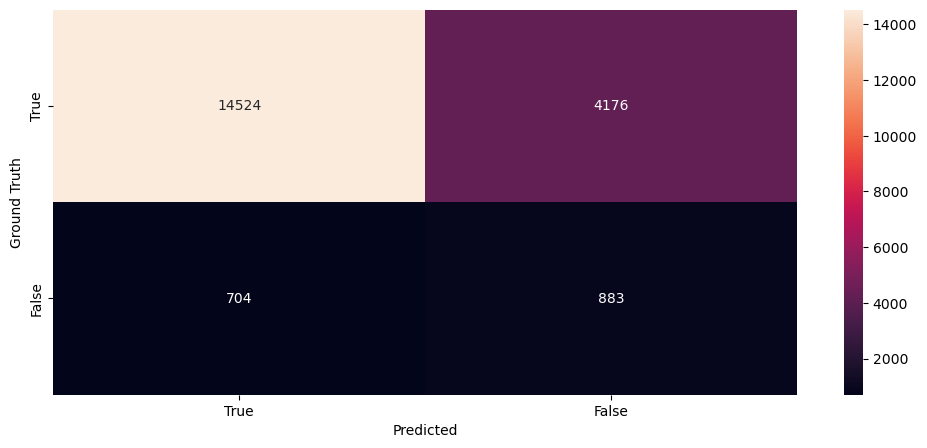

In [34]:
%%time
evaluation_interpretation('lr', lr_opt)

#### 3.2 Random forest

In [35]:
# Random forest from LightGBM due to higher speed in comparison with RandomForest from sklearn
def objective(trial):
    # grid params tree
    param = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['rf'])
        ,'n_estimators': trial.suggest_int('n_estimators', 20, 200)
        ,'max_depth': trial.suggest_int('max_depth', 2, 20)
        ,'learning_rate': trial.suggest_float('learning_rate', 1e-8, 0.1, log=True)          
        ,'subsample': trial.suggest_uniform('subsample', 0.1, 0.9)  
        ,'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1,1)
    #regularization
        ,'num_leaves': trial.suggest_int('num_leaves', 10,200)
        , 'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10, log=True)
        , 'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10, log=True)
    }
    #regularization

    lgbm_opt = LGBMClassifier(**param, n_jobs=-1, random_state=5) #, class_weight='balanced')
    #lgbm_opt.fit(X_train_s, y_train)
    
#    X_t, y_t = X_train.values, y_train.values
    skf = StratifiedKFold(n_splits=5,random_state=5, shuffle=True) #.split(X_t, y_t)
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
    scores = cross_val_score(lgbm_opt, X_train, y_train, scoring=roc_auc_scorer, cv=skf)
    return np.min([np.mean(scores), np.median([scores])])

In [37]:
%%time
# function calling
from optuna.pruners import SuccessiveHalvingPruner
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=0)

study = optuna.create_study(direction='maximize', pruner=pruner) #, pruner=optuna.pruners.MedianPruner()
study.optimize(objective, show_progress_bar=True, timeout=300, # n_trials=500,
              n_jobs=-1)

CPU times: total: 1h 8min 20s
Wall time: 5min 51s


In [36]:
trial = study.best_trial
rf_opt_param = trial.params

rf_opt = LGBMClassifier(**rf_opt_param, n_jobs=-1, random_state=5, verbose= -1) #, class_weight='balanced')
rf_opt.fit(X_train, y_train)
y_pred = rf_opt.predict(X_test)
y_pred_train = rf_opt.predict(X_train)

rf_opt_param

{'boosting_type': 'rf',
 'n_estimators': 97,
 'max_depth': 17,
 'learning_rate': 3.0650976085585655e-05,
 'subsample': 0.7544606691463405,
 'feature_fraction': 0.37470430848608927,
 'num_leaves': 198,
 'lambda_l1': 3.6108597009573736e-05,
 'lambda_l2': 0.7149516249461874}

0.7600890019325178 roc_auc train
0.7117179200949111 roc_auc test

classification report outliers 0,99/0,01
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     18725
           1       0.20      0.64      0.30      1562

    accuracy                           0.77     20287
   macro avg       0.58      0.71      0.58     20287
weighted avg       0.90      0.77      0.82     20287

CPU times: total: 1min 4s
Wall time: 1min 32s


,Feature,Importance
110,f26,0.084367
111,f30,0.072781
6,f41,0.063153
121,f53,0.062826
14,f291,0.029373
2,f29,0.028394
26,f328,0.023172
134,f285,0.022683
84,f495,0.021704
16,f293,0.021377


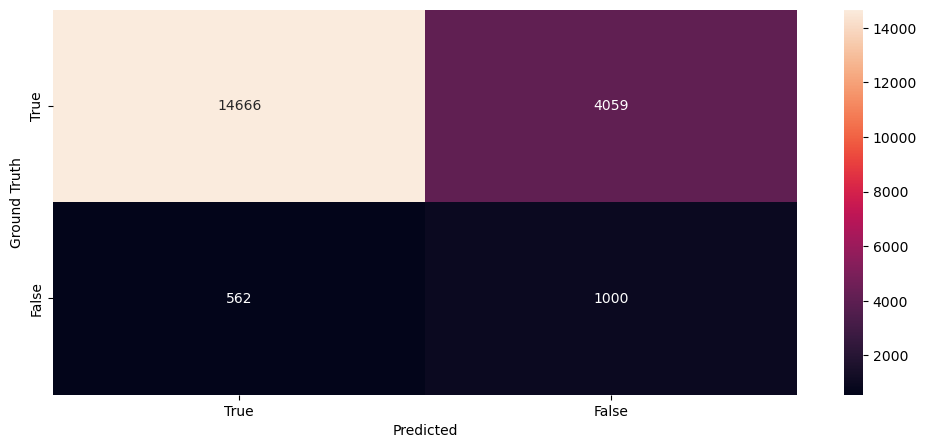

In [37]:
%%time
evaluation_interpretation('rf', rf_opt)

 #### 3.3 Boosting

In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, make_scorer
def objective(trial):
    # grid params
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 200)
        ,'max_depth': trial.suggest_int('max_depth', 2, 10)
        ,'learning_rate': trial.suggest_float('learning_rate', 1e-8, 0.1, log=True)          
        ,'subsample': trial.suggest_uniform('subsample', 0.1, 0.9)  
        ,'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1,1)
    #regularization
        ,'num_leaves': trial.suggest_int('num_leaves', 10,200)
        , 'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10, log=True)
        , 'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10, log=True)
    }
    #regularization

    lgbm_opt = LGBMClassifier(**param, verbose=-1, random_state=5) #, class_weight='balanced')
#    lgbm_opt.fit(X_tr, y_tr)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
    scores = cross_val_score(lgbm_opt, X_train, y_train, scoring=roc_auc_scorer, cv=skf)
    return np.min([np.mean(scores), np.median([scores])])

In [41]:
%%time
# function calling
from optuna.pruners import SuccessiveHalvingPruner, HyperbandPruner 
from optuna.integration import LightGBMPruningCallback
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=0)
#pruner = LightGBMPruningCallback(trial, metric='auc')

study = optuna.create_study(direction='maximize', pruner=pruner) #, pruner=optuna.pruners.MedianPruner()
study.optimize(objective, show_progress_bar=True, timeout=300) # n_trials=500

   0%|          | 00:00/05:00

CPU times: total: 26min 10s
Wall time: 5min


In [39]:
trial = study.best_trial
lgbm_opt_param = trial.params

lgbm_opt = LGBMClassifier(**lgbm_opt_param, verbose= -1, random_state=5, n_jobs=-1) #, class_weight='balanced')

#skf = StratifiedKFold(n_splits=5, shuffle=True)
#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
#scores = cross_val_score(lgbm_opt, X_train, y_train, scoring=roc_auc_scorer, cv=skf)

lgbm_opt.fit(X_train, y_train, eval_metric='auc')

y_pred = lgbm_opt.predict(X_test)
y_pred_train = lgbm_opt.predict(X_train)

lgbm_opt_param

{'n_estimators': 100,
 'max_depth': 7,
 'learning_rate': 0.08361586632202513,
 'subsample': 0.8918224831336519,
 'feature_fraction': 0.44263623568415233,
 'num_leaves': 109,
 'lambda_l1': 9.139178120412168,
 'lambda_l2': 0.15876950786074262}

0.7809930431772422 roc_auc train
0.7132329849543315 roc_auc test

classification report outliers 0,99/0,01
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     18678
           1       0.20      0.64      0.31      1609

    accuracy                           0.77     20287
   macro avg       0.58      0.71      0.59     20287
weighted avg       0.90      0.77      0.82     20287

CPU times: total: 21.6 s
Wall time: 1min 11s


,Feature,Importance
121,f53,1.355031e-01
6,f41,6.275934e-02
16,f293,6.211100e-02
110,f26,5.757261e-02
3,f33,5.316390e-02
111,f30,5.316390e-02
1,f27,4.304979e-02
137,f288,3.112033e-02
103,f1,3.112033e-02
105,f5,2.904564e-02


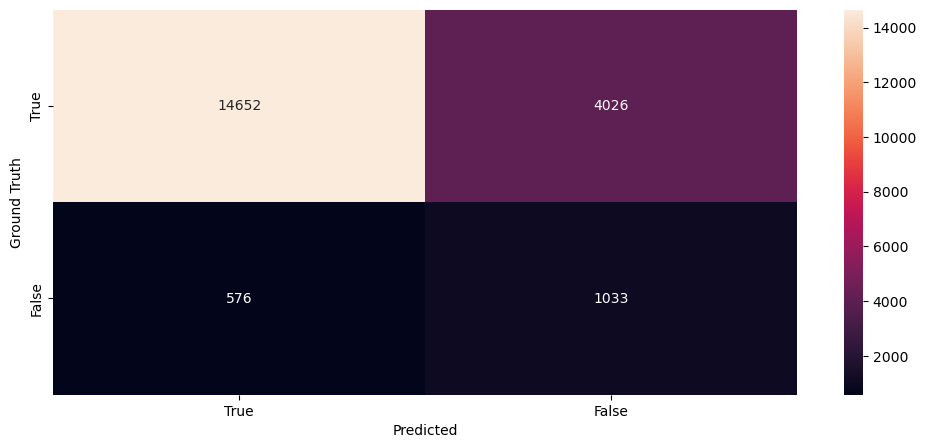

In [40]:
%%time
evaluation_interpretation('lgb', lgbm_opt)

# 5. Final predictions

In [41]:
df_test.tail()

,target,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521
140916,NaN,74190582,11,1,3,F,31,4,1,0,1,0,0,19500,3,1,38068,0,0,0,-1,-1,0,2,0,0,0,4,159,159,9525,11000,4200,0,6746,23,0,1338,1338,NaN,5100,27,116,3,810,0,0,0,123,10,4,4,0,0,14,0,1,0,0,5,2,9,1,2,0,-1,-1,-1,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1091,0,1,2,0,2,4,1,5,15,111,126,13,45,0,2,8,3,3,1,1,8,8,245,245,234,0,"13663,36","1363,64",0,0,135562,4,2,0,0,0,0,0,0,0,0,0,6,6,6,"161306,78","49697,44","111609,34",0,0,"179373,18",10,4,251,0,0,9,1,1,766,24,1,2,3,1,"68485,91","1404,45",0,0,0,0,"0,013220148",0,0,"69465,85","1404,45","0,013220148",0,0,"68374,27","1404,45","0,013220148",0,2,"1,142857143","1,5","1,5",0,0,"1,142857143","1,142857143","1,004098361","1,004098361","1,004291845",0,"1,011394695","1,25",1,1,1,0,0,0,0,0,0,0,0,0,"0,857142857","0,857142857","0,857142857","1,060004308","1,04248765","1,06796838",0,0,"1,116697624","0,909090909",1,1,0,0,"0,9",1,1,"1,011904762",1,1,1,1,1,"1,015964777",1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,"0,993646878","1,090912",1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,"0,9977121",1,"0,996696709",0,0,"0,997942063",1,1,1,0,0,1,1,1,"1,00130719",1,1,1,1,1,"0,985893212",1,0,0,0,0,1,0,2,"1,142857143","1,5",

In [129]:
df_test.describe()

,id,f12,f27,f28,f29,f33,f34,f36,f37,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f315,f316,f317,f318,f319,f322,f328,f334,f335,f336,f337,f338,f339,f340,f343,f344,f345,f348,f349,f350,f352,f353,f354,f355,f358,f360,f361,f362,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f421,f422,f423,f438,f439,f440,f441,f442,f443,f446,f452,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f472,f474,f475,f476,f478,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f517,f518,f519,f520,f521,target,f14,f16,f17,f18,f32,f35,f55,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f1,f2,f5,f9,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f63,f270,f271,f272,f273,f274,f275,f276,f277,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f320,f321,f323,f324,f325,f326,f327,f329,f330,f331,f332,f333,f341,f342,f346,f347,f351,f356,f357,f363,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514,target_lr,target_rf,target_lgb
count,3.820300e+04,38203.000000,38203.000000,38203.000000,38203.0,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,3.820300e+04,3.820300e+04,3.820300e+04,3.820300e+04,38203.000000,3.820300e+04,38203.000000,3.820300e+04,38203.000000,38203.000000,3.820300e+04,38203.000000,3.820300e+04,38203.000000,3.820300e+04,3.820300e+04,3.820300e+04,3.820300e+04,38203.000000,3.820300e+04,3.820300e+04,38203.000000,3.820300e+04,3.820300e+04,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,3.820300e+04,38203.000000,3.820300e+04,3.820300e+04,3.820300e+04,38203.000000,38203.0,3.820300e+04,38203.000000,38203.000000,38203.000000,3.820300e+04,3.820300e+04,38203.000000,38203.000000,38203.000000,38203.000000,3.820300e+04,38203.00,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,3.820300e+04,38203.000000,3.820300e+04,38203.000000,38203.000000,38203.000000,3.820300e+04,3.820300e+04,38203.000000,38203.000000,38203.000000,3.820300e+04,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,38203.000000,3.820300e+04,38203.0,3.820300e+04,3.820300e+04,3.820300e+04,3.820300e+04,38203.000000,38203.000000,38203.000000,3.820300e+04,38203.000000,3.820300e+04,3.820300e+04,38203.000000,3.820300e+04,38203.000000,3.820300e+04,38203.000000,38203.000000,38203.000000,38203.000000,3.820300e+04,3.820300e+04,38203.000000,38203.000000,38203.000000,38203.000000,3.820300e+04,38203.000000,38203

In [128]:
#df_test.isna().sum() commented for github view

In [44]:
X.shape

(101432, 559)

In [45]:
categoricals = df_test.select_dtypes(include=['object']).columns

categoricals = categoricals.drop('f4')
df_test[categoricals] = df_test[categoricals].replace(',', '.', regex=True)
df_test[categoricals] = df_test[categoricals].astype('float64')
df_test = memory_optimizer(df_test)
df_test.info()

31.514735221862793 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38203 entries, 102718 to 140920
Columns: 523 entries, target to f521
dtypes: float16(161), float32(33), float64(1), int16(42), int32(6), int8(279), object(1)
memory usage: 31.5+ MB


In [46]:
df_test

,target,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f470,f471,f472,f473,f474,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521
102718,NaN,77168263,6,21,5,M,37,3,1,0,7,0,14,25000,1,1,38093,0,0,0,-1,-1,0,0,0,29,0,20,4,4,3036.0,9000.0,3600,0,540.000000,0,1,143,118,NaN,1600,14,0,1,118,0,0,0,116,21,14,0,0,0.369629,70,0,1,0.000000,0,0,1,9,1,1,0,-1,-1,-1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,800,0,0,24,0,24,42,3,58,16,133,149,14,81,1,42,59,52,52,31,31,59,59,116,117,116,1,28089.250000,0.000000,12,12,80089,2,2,18,18,18,18,19,19,0,18,18,19,19,19,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,8.661064e+04,21,2,135,0,1,12,9,9,243,1,6,2,123,3,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,12,12,30993.259766,19031.570312,0.674316,12,12,29891.890625,19184.250000,0.692871,1.0,6.5,2.046875,2.572266,2.572266,0.0,0.0,2.046875,2.046875,1.282227,1.278320,1.282227,1.0,1.000000,0.000000,1.000000,1.0,1.0,0,0,2.599609,2.599609,1.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.000000,1.000,1.236328,0.0,1.000000,1.375000,0.666504,0.666504,1.216797,1.000000,1.0,1.0,1.007812,0.166626,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000000,1.615234,1.372070,1.4443

In [47]:
df_test_woe = df_test[df_test.columns.intersection(uniques_cat)]
df_test_woe.shape
#X_train_woe.shape

(38203, 168)

In [48]:
df_test = pd.get_dummies(data=df_test, dtype='int8', columns=['f4'])

df_test_woe = df_test[df_test.columns.intersection(X_train_woe.columns)]
df_test_woe = df_test_woe.astype('category')
df_test_woe = pd.DataFrame(we.transform(df_test_woe))

df_test_num = df_test[df_test.columns.intersection(uniques_num)]
df_test_oh = df_test[df_test.columns.intersection(uniques_oh)]

df_test = df_test_num.join([df_test_oh, df_test_woe])

X_tt = df_test[df_test.columns.intersection(X_train.columns)]

X_tt.shape

(38203, 234)

In [49]:
X_tt

,f12,f27,f29,f33,f34,f36,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f316,f317,f318,f319,f322,f328,f335,f336,f337,f338,f340,f343,f344,f345,f348,f350,f352,f353,f354,f355,f358,f360,f361,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f406,f408,f409,f411,f412,f413,f419,f438,f440,f442,f443,f446,f452,f458,f459,f463,f464,f465,f467,f468,f469,f472,f474,f475,f476,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f521,f69,f83,f173,f174,f238,f253,f260,f1,f2,f5,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f271,f272,f273,f274,f275,f276,f277,f280,f281,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f302,f303,f304,f306,f307,f311,f312,f313,f321,f323,f324,f325,f326,f327,f329,f330,f332,f341,f342,f346,f347,f351,f356,f357,f371,f372,f373,f374,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f426,f427,f428,f429,f431,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f485,f486,f487,f488,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514
102718,25000,4,3036.0,540.000000,0,143,0,118,116,0.369629,0.000000,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,55419.621094,19960.550781,0.000000,8.661064e+04,135,243,18869.849609,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,116.000000,1.615234,1.444336,1.444336,2.066406,1.160156,1.244909,1.421343,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.969942,116.000000,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.944336,1,1,0,0,0,0,0,-0.121846,-0.071089,-0.121870,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652,0.016509,0.259998,-0.091438,0.341045,0.017160,0.011508,-0.011215,-0.155034,-0.416233,-0.507652,-0.121990,-0.119886,-0.046837,-0.139326,0.125063,0.234285,0.157324,-0.000620,0.498745,0.500384,-0.003958,-0.364551,-0.197497,0.367817,-0.087798,0.157324,-0.029616,0.090185,-0.020357,0.011083,0.025177,0.043160,-0.204672,-0.443573,-0.457152,0.191249,-0.057498,-0.035293,0.471553,0.499773,0.494856,0.495962,-0.071021,0.010018,0.006883,0.226317,0.328596,-0.084361,-0.122192,0.009160,0.009498,-0.081978,-0.130831,0.049422,0.149608,-0.003891,0.040073,0.079877,-0.190982,-0.095917,-0.093390,-0.046194,-0.053961,-0.035357,0.508011,-0.689974,-0.077847,-0.023528,-0.894768,-1.136261,-0.284508,0.003174,0.003174,-0.144013,-0.163439,-0.284508,0.003174,-0.402291,-0.402291,-0.005105,0.03187,0.024686,-0.309201,0.036481,0.039479,-0.071150,-0.060968,-0.046799,0.535053,-0.158971,0.010018,0.006883,-0.036014,1.794933,1.101786,-0.284508,0.003174,0.009075,0.000000,0.000000,0.590960,-0.507652,-0.006274,0.036785,0.077441,-0.037281,-0.043700,-0.043621,-0.048685,-0.055901,-0.039413,-0.419759
102719,19000,54,3950.0,4102.700195,41,308,0,89,12,0.810059,0.000000,1065,47,61,38,42,26,11424.349609,0.000000,23124,89158.453125,49405.261719,22.350000,42693.160156,6.066506e+04,39,175,5623.740234,15227.519531,13773.700195,39730.839844,0.780762,7723.660156,5860.000000,0.780762,7705.390137,0.802734,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.046334,1.000000,1.071289,1.0,0.91748,1.000000,1.026367,1.017578,1.001953,0.975586,1.016602,9.500000,0.000000,0.000000,0.000000,0.000000,1.040039,0.963313,0.933403,1.0,1.000000,1.000000,1.005859,0.969238,0.959683,1.003906,1.000152,9.500000,0.000000,0.000000,0.000000,0.000000,1.027344,1.024414,1.040039,0.000000,1.000000,1.007947,1.000000,1.000000,1.0,0.91748,1.000000,1.026367,1.023438,1.048828,0.971680,0.9

In [50]:
# missing values (NaNs)
#X_tt = X_tt.fillna(X_tt.median())
X_tt_s = pd.DataFrame(ss.fit_transform(X_tt))
X_tt_s.columns = X_tt.columns

In [51]:
X_tt.describe().T

,count,mean,std,min,25%,50%,75%,max
f12,38203.0,1.849040e+04,1.673658e+04,10.000000,10000.000000,15000.000000,20000.000000,1.000000e+06
f27,38203.0,9.273206e+01,2.110271e+02,0.000000,1.000000,13.000000,51.000000,1.933000e+03
f29,38203.0,inf,inf,0.000000,0.000000,2000.000000,4300.000000,2.750400e+04
f33,38203.0,1.556424e+03,4.848145e+03,0.000000,0.000000,200.000000,1050.000000,1.224000e+05
f34,38203.0,1.975544e+01,8.540772e+01,0.000000,0.000000,0.000000,2.000000,1.901000e+03
f36,38203.0,3.146111e+02,4.514570e+02,-1.000000,-1.000000,92.000000,434.000000,2.078000e+03
f41,38203.0,6.537953e+01,1.821869e+02,-1.000000,0.000000,2.000000,19.000000,1.799000e+03
f43,38203.0,1.370614e+02,2.613431e+02,-1.000000,0.000000,28.000000,150.000000,1.990000e+03
f47,38203.0,6.417548e+01,1.109908e+02,0.000000,11.000000,32.000000,78.000000,2.318000e+03
f52,38203.0,1.959229e-01,2.988281e-01,0.000000,0.000000,0.027908,0.280640,1.000000e+00


#### 5.1. Logistic Regression Submission

In [52]:
y_tt_lr = lr_opt.predict_proba(X_tt_s)[:,1]
y_tt_lr = pd.DataFrame(y_tt_lr)
#y_tt_lr
df_test['target_lr']=y_tt_lr.values
#submission.to_csv('submitted_feo_lr.csv', index=False)
df_test.head()

,id,f12,f27,f28,f29,f33,f34,f36,f37,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f315,f316,f317,f318,f319,f322,f328,f334,f335,f336,f337,f338,f339,f340,f343,f344,f345,f348,f349,f350,f352,f353,f354,f355,f358,f360,f361,f362,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f421,f422,f423,f438,f439,f440,f441,f442,f443,f446,f452,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f472,f474,f475,f476,f478,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f517,f518,f519,f520,f521,target,f14,f16,f17,f18,f32,f35,f55,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f1,f2,f5,f9,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f63,f270,f271,f272,f273,f274,f275,f276,f277,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f320,f321,f323,f324,f325,f326,f327,f329,f330,f331,f332,f333,f341,f342,f346,f347,f351,f356,f357,f363,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514,target_lr
102718,77168263,25000,4,4,3036.0,540.000000,0,143,118,0,118,116,0.369629,0.0,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,86610.640625,135,243,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,19184.250000,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.282227,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000,1.615234,1.37207,1.444336,1.444336,2.066406,2.066406,1.372070,1.160156,1.158203,1.160156,1.000000,0.000000,1.141602,1.244909,1.000000,1.421343,1.0,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.000000,0.00000,0.000000,0.969942,116.000,10.5,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,1.000000,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.000000,0.00000,0.000000,0.000000,0.944336,NaN,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,-0.121846,-0.071089,-0.12187,0.151037,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652,0.016509,0.005091,-0.2044

In [53]:
df_test['target_lr'].mean()

0.2512218994515058

#### 5.2. Random Forest Submission

In [54]:
y_tt_rf = rf_opt.predict_proba(X_tt)[:,1]
y_tt_rf = pd.DataFrame(y_tt_rf)
df_test['target_rf']=y_tt_rf.values
#submission.to_csv('submitted_feo_rf.csv', index=False)
df_test.head()

,id,f12,f27,f28,f29,f33,f34,f36,f37,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f315,f316,f317,f318,f319,f322,f328,f334,f335,f336,f337,f338,f339,f340,f343,f344,f345,f348,f349,f350,f352,f353,f354,f355,f358,f360,f361,f362,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f421,f422,f423,f438,f439,f440,f441,f442,f443,f446,f452,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f472,f474,f475,f476,f478,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f517,f518,f519,f520,f521,target,f14,f16,f17,f18,f32,f35,f55,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f1,f2,f5,f9,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f63,f270,f271,f272,f273,f274,f275,f276,f277,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f320,f321,f323,f324,f325,f326,f327,f329,f330,f331,f332,f333,f341,f342,f346,f347,f351,f356,f357,f363,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514,target_lr,target_rf
102718,77168263,25000,4,4,3036.0,540.000000,0,143,118,0,118,116,0.369629,0.0,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,86610.640625,135,243,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,19184.250000,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.282227,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000,1.615234,1.37207,1.444336,1.444336,2.066406,2.066406,1.372070,1.160156,1.158203,1.160156,1.000000,0.000000,1.141602,1.244909,1.000000,1.421343,1.0,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.000000,0.00000,0.000000,0.969942,116.000,10.5,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,1.000000,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.000000,0.00000,0.000000,0.000000,0.944336,NaN,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,-0.121846,-0.071089,-0.12187,0.151037,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652,0.016509,0.0050

In [55]:
df_test['target_rf'].mean()

0.26070771111402674

#### 5.3. LightGBM Submission

In [56]:
y_tt_lgbm = lgbm_opt.predict_proba(X_tt)[:,1]
y_tt_lgbm = pd.DataFrame(y_tt_lgbm)
df_test['target_lgb']=y_tt_lgbm.values
# taking into aacount that lightgbm is the modt advanced algorithm for target column we use target_lgb
df_test['target_lgb']=y_tt_lgbm.values
df_test['target']=y_tt_lgbm.values
df_test.head()

,id,f12,f27,f28,f29,f33,f34,f36,f37,f41,f43,f47,f52,f56,f268,f278,f279,f291,f292,f293,f295,f296,f299,f314,f315,f316,f317,f318,f319,f322,f328,f334,f335,f336,f337,f338,f339,f340,f343,f344,f345,f348,f349,f350,f352,f353,f354,f355,f358,f360,f361,f362,f364,f365,f366,f381,f382,f383,f384,f385,f386,f389,f395,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f417,f418,f419,f421,f422,f423,f438,f439,f440,f441,f442,f443,f446,f452,f458,f459,f460,f461,f462,f463,f464,f465,f466,f467,f468,f469,f472,f474,f475,f476,f478,f479,f480,f495,f496,f497,f498,f499,f500,f503,f509,f513,f515,f516,f517,f518,f519,f520,f521,target,f14,f16,f17,f18,f32,f35,f55,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f134,f135,f136,f137,f138,f139,f141,f142,f143,f144,f145,f146,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f220,f221,f222,f223,f224,f225,f226,f227,f228,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f1,f2,f5,f9,f11,f15,f22,f24,f26,f30,f31,f39,f40,f44,f45,f48,f49,f50,f51,f53,f60,f63,f270,f271,f272,f273,f274,f275,f276,f277,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f294,f297,f298,f300,f301,f302,f303,f304,f305,f306,f307,f309,f310,f311,f312,f313,f320,f321,f323,f324,f325,f326,f327,f329,f330,f331,f332,f333,f341,f342,f346,f347,f351,f356,f357,f363,f367,f368,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f387,f388,f390,f391,f392,f393,f394,f396,f397,f398,f399,f400,f420,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f444,f445,f447,f448,f449,f450,f451,f453,f454,f455,f456,f457,f470,f471,f477,f481,f482,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f501,f502,f504,f505,f506,f507,f508,f510,f511,f512,f514,target_lr,target_rf,target_lgb
102718,77168263,25000,4,4,3036.0,540.000000,0,143,118,0,118,116,0.369629,0.0,800,133,149,116,117,116,28089.250000,0.000000,80089,83508.867188,28089.250000,55419.621094,19960.550781,0.000000,86610.640625,135,243,32550.980469,18869.849609,0.000000,0.000000,0.000000,0.000000,0.654297,30993.259766,19031.570312,0.674316,29891.890625,19184.250000,0.692871,6.5,2.046875,2.572266,2.572266,2.046875,1.282227,1.278320,1.282227,1.000000,0.000000,1.000000,0.956271,1.000000,0.927246,1.0,0.00000,1.164174,1.236328,1.216797,1.037109,0.992188,0.000000,0.000000,0.000000,0.000000,0.973633,116.000,1.615234,1.37207,1.444336,1.444336,2.066406,2.066406,1.372070,1.160156,1.158203,1.160156,1.000000,0.000000,1.141602,1.244909,1.000000,1.421343,1.0,0.0,1.193598,1.173828,1.167969,1.049805,0.991503,0.000000,0.000000,0.00000,0.000000,0.969942,116.000,10.5,2.808594,3.714844,3.714844,2.808594,1.487305,1.481445,1.487305,1.000000,0.000000,1.141602,1.190471,1.000000,1.317383,1.0,0.00000,1.389556,1.451172,1.420898,1.016602,1.088867,0.983398,0.000000,0.00000,0.000000,0.000000,0.944336,0.193907,1,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,-0.121846,-0.071089,-0.12187,0.151037,-0.019462,0.067040,0.002569,0.485600,-0.126182,-0.446053,-0.289928,0.011613,-0.072728,-0.040536,0.005517,-0.442137,-0.638349,0.222187,0.054474,-0.513652

In [57]:
df_test['target_lgb'].mean()

0.24647453478806727

In [58]:
df_test[['id', 'target_lr', 'target_rf','target_lgb']].head()

,id,target_lr,target_rf,target_lgb
102718,77168263,0.198844,0.188843,0.193907
102719,77727465,0.307964,0.205995,0.210987
102720,77242568,0.093100,0.150538,0.097122
102721,77599785,0.604138,0.277831,0.226979
102722,75865710,0.085590,0.146159,0.078377


# 5. Data drift monitoring (bonus section)

In [59]:
! pip install feature_engine -q

In [60]:
def psi_feature_monitor(X_train, X_test):
    from feature_engine.selection import DropHighPSIFeatures
    transformer = DropHighPSIFeatures()
    transformer.fit(X_train, X_test)
    psi = pd.Series(transformer.psi_values_, index=X_test.columns)

    psi = pd.DataFrame(psi).reset_index() 
    psi.columns =['Feature', 'PSI']
    return print(psi.sort_values(by='PSI', ascending=False)), print('Total PSI (all features)', '\n', psi['PSI'].sum())

In [134]:
psi_feature_monitor(X_train, X_tt)

    Feature           PSI
105      f5  5.704662e-03
32     f343  1.653512e-03
35     f348  1.377073e-03
221    f493  9.026452e-04
112     f31  8.558207e-04
129    f277  8.199300e-04
132    f283  8.044551e-04
151    f321  7.509824e-04
223    f501  7.409674e-04
93     f515  7.231624e-04
84     f495  7.162132e-04
19     f299  6.942062e-04
8       f47  6.733029e-04
11     f268  6.674059e-04
150    f313  6.645586e-04
104      f2  6.510010e-04
55     f401  6.271188e-04
170    f374  6.188764e-04
74     f465  6.025091e-04
107     f15  5.975821e-04
70     f458  5.926786e-04
158    f330  5.911806e-04
183    f396  5.858388e-04
16     f293  5.837902e-04
68     f446  5.713003e-04
56     f402  5.581553e-04
26     f328  5.568025e-04
128    f276  5.550177e-04
14     f291  5.494313e-04
227    f506  5.465498e-04
117     f48  5.444241e-04
220    f492  5.224001e-04
203    f448  5.144723e-04
174    f379  5.060354e-04
73     f464  5.004622e-04
80     f475  4.986992e-04
15     f292  4.972685e-04
31     f340 

(None, None)

#### As a conclusion we can notice that train/test samples and new sapmle for prediction have acceptable changes and suits for ML models in general.

# 6. Next steps:
#### So, we have fit the model and made predictions. But in future we can make some steps to improve performance and usability/modularity of our functions for next models.

#### Model performance:
- creating new features by adding, subtracting, multiplying, dividing of numerical features
- pairwise combinations of categorical features
- adding StratifyKFold to WOEEncoding
- exclude features with highest PSI and/or split data insuch way that can decrease difference between train/test/predicting samples.
- probably custom woe binning can have positive effect especially in logistic regression case.

#### Model scalability and modularity:
- standardazing and integraiting step-by-step preprocessing and modeling to custom sklearn pipelines (BaseEstimator, TransformerMixin)

#### Interpretability:
- SHAP Values can be one of interesting solutions. if sometimes we need to explain credit decision about specific customer. 

# 7. Improvings

#### SHAP values:
- are useful for interpretation of black-box models first of all boostings and deep learning models.
- In our case it is boosting
- You can find out interpretation of all features for predicted data and for single prediction.

In [96]:
def shap_explanations(X, model, i):
        df_explainer = shap.TreeExplainer(model, link='logit')
        df_shap_values = df_explainer(X)
        shap.initjs()
    
        row = X.iloc[[i]]
        shap_values_row = df_explainer.shap_values(row)
       
        shap.summary_plot(df_shap_values[:,:, 1], X), 
        shap.summary_plot(df_shap_values[:,:, 1], X, plot_type='bar')

        force_plot = shap.force_plot(df_explainer.expected_value[1], shap_values_row[1], row, link='logit')
    return force_plot

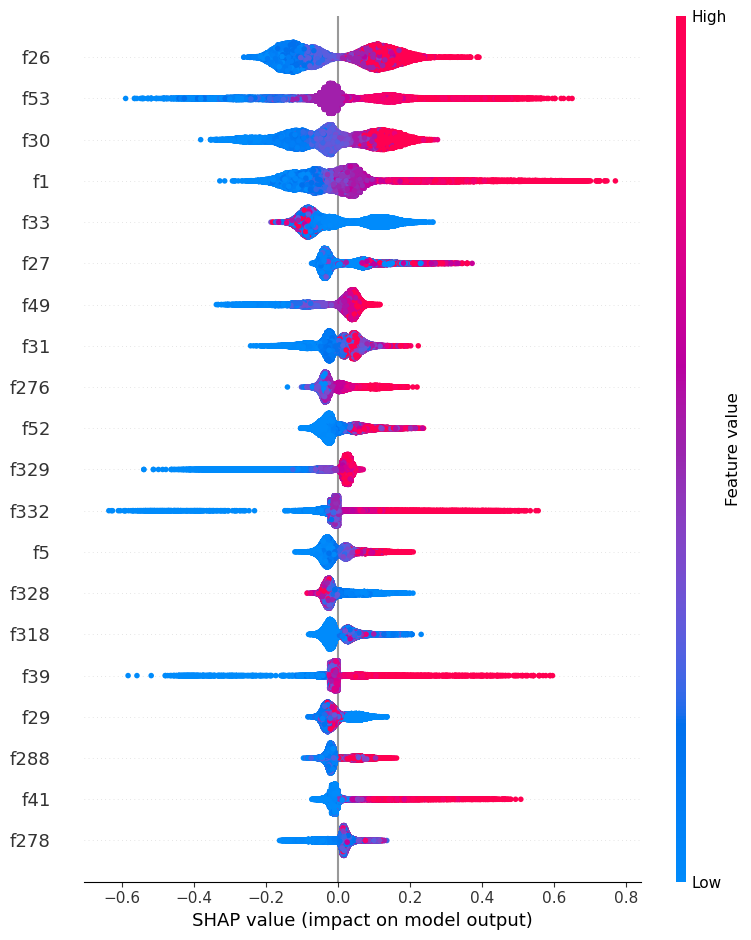

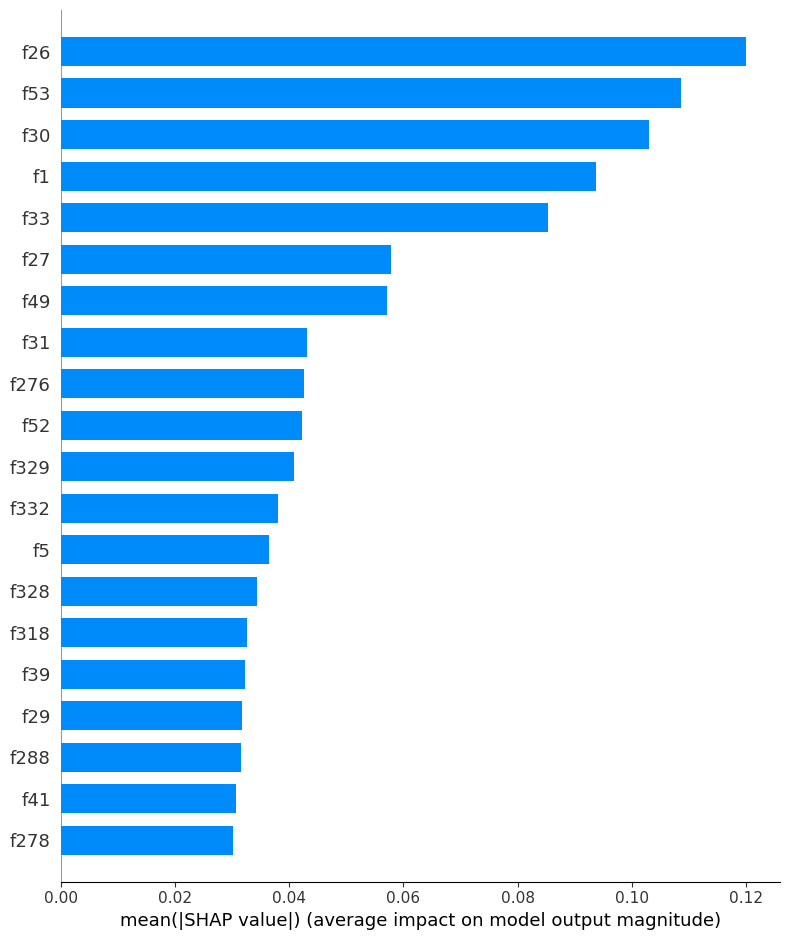

In [125]:
# summary_plots - provide us information about model at all
#force plot provides us decision about selected client by index (i argument)
shap_explanations(X=X_tt, model = lgbm_opt, i=55)